<a href="https://colab.research.google.com/github/yasminfrancagarcia/cnn/blob/main/C%C3%B3pia_de_VersaoFInalTrabalho2AprendizadoDeM%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho 2 de Aprendizado de Máquina Profundo**
**Alunos: Francisco Júnior e Yasmin França Garcia**

## 1. Faça o download do dataset em https://tltsilveira.github.io/public/dl-25-2-dataset.zip. Utilize !wget e !unzip para acessar os dados via Google Colab. Utilize o modulo csv para leitura dos rotulos e o módulo  skimage.io para leitura das imagens. As imagens estao no diretório imagens e os respectivos rotulos estao no arquivo rotulos.csv.

In [ ]:
!wget https://tltsilveira.github.io/public/dl-25-2-dataset.zip #fazer download do arquivo compactado

--2025-11-28 16:37:59--  https://tltsilveira.github.io/public/dl-25-2-dataset.zip
Resolving tltsilveira.github.io (tltsilveira.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to tltsilveira.github.io (tltsilveira.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042887 (1.9M) [application/x-zip-compressed]
Saving to: ‘dl-25-2-dataset.zip’

dl-25-2-dataset.zip 100%[===================>]   1.95M  --.-KB/s    in 0.02s   

2025-11-28 16:37:59 (88.5 MB/s) - ‘dl-25-2-dataset.zip’ saved [2042887/2042887]



In [ ]:
!unzip dl-25-2-dataset.zip #descompactar o arquivo

Archive:  dl-25-2-dataset.zip
  inflating: rotulos.csv             
  inflating: __MACOSX/._rotulos.csv  
   creating: imagens/
  inflating: __MACOSX/._imagens      
  inflating: imagens/1680560120019_jpg.rf.8a9bb987c88860f5b71d6a2f1541a2731.jpg  
  inflating: __MACOSX/imagens/._1680560120019_jpg.rf.8a9bb987c88860f5b71d6a2f1541a2731.jpg  
  inflating: imagens/1666100667553_jpg.rf.0d49b3b94535fb2c14897faf0c4621991.jpg  
  inflating: __MACOSX/imagens/._1666100667553_jpg.rf.0d49b3b94535fb2c14897faf0c4621991.jpg  
  inflating: imagens/1680560120051_jpg.rf.f9a2c4f5e58999b1c8e87e2219c78b892.jpg  
  inflating: __MACOSX/imagens/._1680560120051_jpg.rf.f9a2c4f5e58999b1c8e87e2219c78b892.jpg  
  inflating: imagens/1680560120896_jpg.rf.85e9c2a742a68250eafc5f11ac908e740.jpg  
  inflating: __MACOSX/imagens/._1680560120896_jpg.rf.85e9c2a742a68250eafc5f11ac908e740.jpg  
  inflating: imagens/1680560120284_jpg.rf.a3fdf4d0d9936d227714509faf9a16f90.jpg  
  inflating: __MACOSX/imagens/._1680560120284_jpg.rf

In [ ]:
!rm -rf dl-25-2-dataset.zip #remover o arquivo compactado, não utilizaremos mais

In [ ]:
!pip install tensorflow #instalar tensorflow

In [ ]:
import os
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Configuração das imagens

In [ ]:
image_width = 64
image_height = 64
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = (image_width, image_height, image_color_channel)
num_classes = 4 #4 tipos de componentes
class_names = ['Componente 0', 'Componente 1', 'Componente 2', 'Componente 3']
image_dir = 'imagens'
labels_file = 'rotulos.csv'

#parametros
batch_size = 16#quantidade de features que vou trazer
ephocs = 100 #quantidade de vezes que vou passar pela rede neural
learning_rate = 0.001

#listas para armazenar os dados
images = []
labels = []



In [ ]:
print("Iniciando leitura dos dados")
# Abrindo o arquivo CSV de rótulos
try:
    with open(labels_file, mode='r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)

        # Pular o cabeçalho (ex: 'imagem', 'rotulo')
        #next(csv_reader)

        #Iterar sobre cada linha do CSV
        for row in csv_reader:
            try:
                img_filename = row[0]
                label = int(row[1]) # O rótulo é a segunda coluna

                #construir o caminho completo da imagem
                img_path = os.path.join(image_dir, img_filename)

                #ler a imagem usando skimage.io
                #a imagem já é carregada como um array NumPy (64, 64, 3)
                img = io.imread(img_path)

                # adicionar a imagem e o rótulo nas listas
                images.append(img)
                labels.append(label)

            except FileNotFoundError:
                print(f"Aviso: Imagem {img_filename} não encontrada. Pulando.")
            except Exception as e:
                print(f"Erro ao processar {img_filename}: {e}")

    print(f"Leitura concluída. Total de {len(images)} imagens carregadas.")

except FileNotFoundError:
    print(f"Erro: Arquivo {LABELS_FILE} não encontrado.")
    print("Certifique-se de que o !unzip foi executado corretamente e os arquivos estão no local esperado.")
    # Pare a execução se os rótulos não puderem ser lidos
    # raise

# Converter as listas para arrays NumPy
x = np.array(images)
y = np.array(labels)

print(f"Shape do array de imagens (X): {x.shape}")
print(f"Shape do array de rótulos (y): {y.shape}")

Iniciando leitura dos dados
Leitura concluída. Total de 957 imagens carregadas.
Shape do array de imagens (X): (957, 64, 64, 3)
Shape do array de rótulos (y): (957,)


Função auxiliar para plotar algumas imagens do dataset

In [ ]:
import math
def plot_dataset(dataset, class_names):
    """
    Plota TODAS as imagens de um único batch de um tf.data.Dataset.

    Argumentos:
        dataset (tf.data.Dataset): O dataset de onde pegar o batch.
        class_names (list): Uma lista de strings com os nomes das classes.
    """
   #Pega apenas o primeiro batch do dataset
    for images, labels in dataset.take(1):

        #descobre o tamanho do batch
        batch_size = images.shape[0] # Pega o número de imagens (ex: 32)

        # Calcula um grid dinâmico para plotar
        # Vamos fixar 8 colunas e calcular as linhas necessárias
        cols = 8
        # math.ceil arredonda para cima (ex: 32/8 = 4.0 -> 4)
        # (ex: 30/8 = 3.75 -> 4)
        rows = math.ceil(batch_size / cols)

        # Cria a figura com um tamanho proporcional
        # (cols * 2) = largura, (rows * 2.5) = altura (um pouco mais alto para o título)
        plt.figure(figsize=(cols * 2, rows * 2.5))

        #itera por todas as imagens no batch
        for i in range(batch_size):

            #Cria o subplot na posição (linha, coluna, índice)
            ax = plt.subplot(rows, cols, i + 1)
            plt.axis('off')

            # Exibe a imagem (assumindo que está normalizada [0,1])
            plt.imshow(images[i].numpy())

            label_data = labels[i].numpy()

            if label_data.ndim > 0: # Se for one-hot (vetor)
                label_index = np.argmax(label_data)
            else: # Se for inteiro (escalar)
                label_index = label_data

            plt.title(class_names[label_index])

    # Ajusta o espaçamento para não sobrepor os títulos
    plt.tight_layout()
    plt.show()

exibindo o batch de imagens de amostra do conjunto de treino


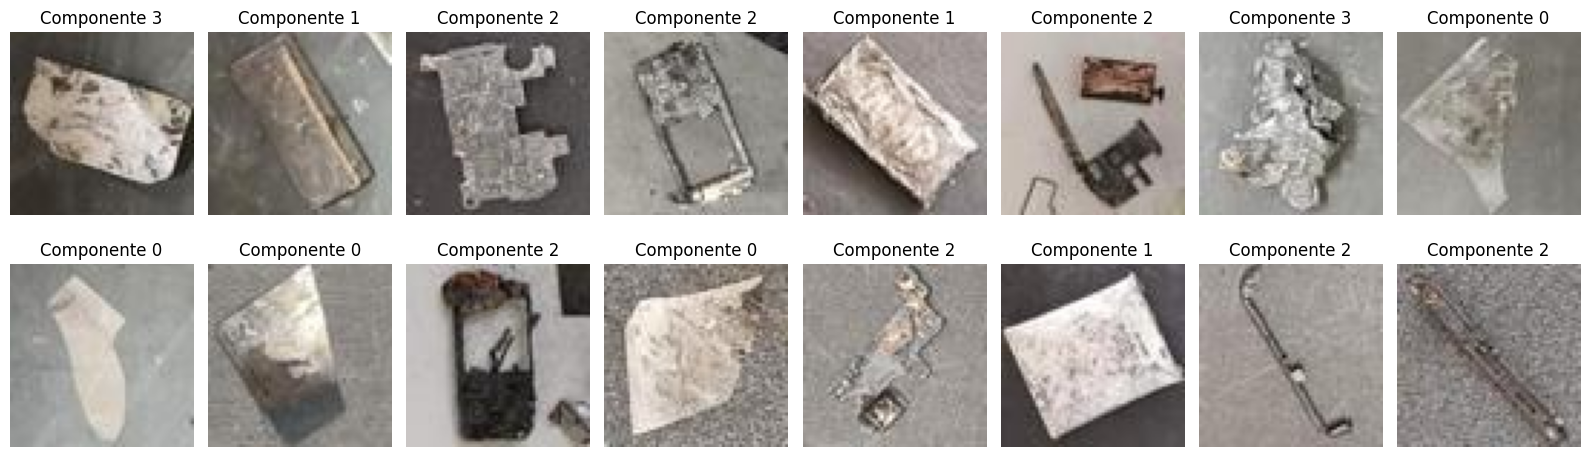

In [ ]:

# criaremos um dataset apenas para visualização
plot_ds = tf.data.Dataset.from_tensor_slices((x, y))
plot_ds = plot_ds.shuffle(1000).batch(batch_size)
print("exibindo o batch de imagens de amostra do conjunto de treino")
plot_dataset(plot_ds, class_names)


## 2. Trabalhe sobre o conjunto de dados, normalizando os valores dos pixels e realizando uma divisao estratificada dos dados para criar seus proprios conjuntos independentes de treino e validação ( e.g., 80%/20% ou 85%/15%).

In [ ]:
# Normalização: Converter pixels de [0, 255] para [0, 1]
X_normalized = x.astype('float32') / 255.0 # .astype('float32') garante que teremos números com casas decimais (ponto flutuante)

# Divisão Estratificada (80% treino, 20% validação)
# 'stratify=y' garante que a proporção de classes seja a mesma nos conjuntos de treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_normalized,
    y,
    test_size=0.20,  # 20% para validação
    stratify=y,      # Divisão estratificada
    random_state=42  # Para reprodutibilidade
)

# One-Hot Encoding dos Rótulos
# Converte [0, 1, 2, 3] para:
# [1, 0, 0, 0]
# [0, 1, 0, 0]
# [0, 0, 1, 0]
# [0, 0, 0, 1]
# Necessário para a loss 'categorical_crossentropy'
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)

print(f"\nConjunto de Treino: {X_train.shape}, {y_train_cat.shape}")
print(f"Conjunto de Validação: {X_val.shape}, {y_val_cat.shape}")


Conjunto de Treino: (765, 64, 64, 3), (765, 4)
Conjunto de Validação: (192, 64, 64, 3), (192, 4)


In [ ]:
import pandas as pd
print("Distribuição das classes total:")
print(pd.Series(y).value_counts())
print(f"Distribuição de classes de TREINO :\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"\nDistribuição de classes de VALIDAÇÃO :\n{pd.Series(y_val).value_counts().sort_index()}")

Distribuição das classes total:
0    309
1    255
2    209
3    184
Name: count, dtype: int64
Distribuição de classes de TREINO :
0    247
1    204
2    167
3    147
Name: count, dtype: int64

Distribuição de classes de VALIDAÇÃO :
0    62
1    51
2    42
3    37
Name: count, dtype: int64


## 3. Projete e implemente uma arquitetura de uma CNN para endereçar o problema. Lembre-se que o problema mapeia imagens 64x64x3 para quatro classes. O modelo final nao deve ultrapassar 5.000.000 de parâmetros.

In [ ]:
# 3. Implementar CNN com Blocos Residuais
print("=== IMPLEMENTANDO CNN COM BLOCOS RESIDUAIS ===")

# Definir bloco residual básico
def residual_block(x, filters, kernel_size=3, stride=1, activation='relu'):
    """
    Bloco residual simples para redes mais profundas
    """
    # Camada principal
    shortcut = x

    # Primeira convolução
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    # Segunda convolução
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Ajustar shortcut se necessário (dimensões diferentes)
    if shortcut.shape[-1] != filters or stride != 1:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adicionar resíduo
    x = layers.Add()([x, shortcut])
    x = layers.Activation(activation)(x)

    return x

# Criar modelo com blocos residuais usando Functional API
def create_residual_model():
    inputs = layers.Input(shape=image_shape)

    # Data augmentation
    # x = data_augmentation(inputs) # Data augmentation not defined in this scope

    # Camada inicial
    x = layers.Conv2D(32, 7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Blocos residuais
    # Bloco 1
    x = residual_block(x, 32)
    x = layers.Dropout(0.25)(x)

    # Bloco 2 - aumentar filtros
    x = residual_block(x, 64, stride=2)  # Downsample
    x = residual_block(x, 64)
    x = layers.Dropout(0.25)(x)

    # Bloco 3 - aumentar filtros
    x = residual_block(x, 128, stride=2)  # Downsample
    x = residual_block(x, 128)
    x = layers.Dropout(0.3)(x)

    # Bloco 4
    x = residual_block(x, 256, stride=2)  # Downsample
    x = residual_block(x, 256)
    x = layers.Dropout(0.3)(x)

    # Camadas finais
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = create_residual_model()

print("\n=== RESUMO DO MODELO RESIDUAL ===")
model.summary()
total_params = model.count_params()
print(f"\nTotal de parâmetros: {total_params:,}")

=== IMPLEMENTANDO CNN COM BLOCOS RESIDUAIS ===

=== RESUMO DO MODELO RESIDUAL ===


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      4,736 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      9,248 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 16,    │          0 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 64)  │     18,496 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 64)  │      2,112 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_4[0][0]  

 Total params: 3,054,340 (11.65 MB)

 Trainable params: 3,048,132 (11.63 MB)

 Non-trainable params: 6,208 (24.25 KB)


Total de parâmetros: 3,054,340


##4. Implemente técnicas de aumento de dados para expandir artificialmente o conjunto de treino e melhorar a robustez do modelo a novos dados. Considere também outras formas de regularização em seu modelo.

 Outras Formas de Regularização
  Já usamos as 2 mais importantes:  

*   Dropout: Ele "desliga" aleatoriamente os neurônios para forçar a rede a não depender de um único "caminho" para tomar uma decisão.
*   BatchNormalization: Além de acelerar o treino, ela tem um leve efeito regularizador.

Vamos agora testar outra forma de regularização:
 - Regularização L2 (Weight Decay): funciona adicionando uma "multa" na rede. A rede é penalizada por ter pesos (parâmetros) muito grandes. Isso a força a aprender soluções mais "simples" e "suaves", que generalizam melhor e evitam o overfitting.
 Para implementar, adicionaremos o argumento kernel_regularizer na camada Conv2D e nas camadas densas.







In [ ]:

def residual_block(x, filters, kernel_size=3, stride=1, activation='relu'):
    """
    Bloco residual simples para redes mais profundas
    """
    # Camada principal
    shortcut = x

    # Primeira convolução
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    # Segunda convolução
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Ajustar shortcut se necessário (dimensões diferentes)
    if shortcut.shape[-1] != filters or stride != 1:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adicionar resíduo
    x = layers.Add()([x, shortcut])
    x = layers.Activation(activation)(x)

    return x


In [ ]:
 #Criar modelo com blocos residuais usando Functional API
def create_residual_model_with_aug(): # Mudei o nome da função
    inputs = layers.Input(shape=image_shape)

    # 1. Data Augmentation
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2)
    ], name="data_augmentation")

    x = data_augmentation(inputs)

    # 2. CAMADA INICIAL

    x = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)


    # 3. Blocos Residuais (usando a sua função)
    x = residual_block(x, 32, stride=1)
    x = layers.Dropout(0.25)(x)
    x = residual_block(x, 64, stride=2)  # Downsample -> 32x32
    x = layers.Dropout(0.25)(x)
    x = residual_block(x, 128, stride=2) # Downsample -> 16x16
    x = layers.Dropout(0.3)(x)
    x = residual_block(x, 256, stride=2) # Downsample -> 8x8
    x = layers.Dropout(0.3)(x)

    # 4. Camadas Finais (Head)
    x = layers.GlobalAveragePooling2D()(x)

    # (Reduzi a cabeça densa do seu modelo para 1 camada,
    #  o que é mais seguro contra overfitting)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = create_residual_model_with_aug()

print("\n=== RESUMO DO MODELO RESIDUAL COM AUGMENTATION ===")
model.summary()


=== RESUMO DO MODELO RESIDUAL COM AUGMENTATION ===


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 64, 64, 3) │          0 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 64, 64,    │        896 │ data_augmentatio… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 64, 64,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 64, 64,    │      9,248 │ activation_14[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 64, 64,    │          0 │ add_7[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64, 64,    │          0 │ activation_15[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │     18,496 │ dropout_6[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_16[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │      2,112 │ dropout_6[0][0] 

 Total params: 1,298,564 (4.95 MB)

 Trainable params: 1,295,172 (4.94 MB)

 Non-trainable params: 3,392 (13.25 KB)

# Testando regularização l2

In [ ]:
def residual_block_l2(x, filters, kernel_size=3, stride=1, activation='relu'):
        """
        Residual block with L2 regularization.
        """
        shortcut = x

        x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', kernel_regularizer=l2_reg)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation(activation)(x)

        x = layers.Conv2D(filters, kernel_size, strides=1, padding='same', kernel_regularizer=l2_reg)(x)
        x = layers.BatchNormalization()(x)

        if shortcut.shape[-1] != filters or stride != 1:
            shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same', kernel_regularizer=l2_reg)(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        x = layers.Add()([x, shortcut])
        x = layers.Activation(activation)(x)
        return x

In [ ]:
from tensorflow.keras import regularizers

l2_reg = regularizers.l2(0.0001)

def create_residual_model_with_aug_L2(image_shape, num_classes):
    """

    *** regularização l2 nas camadas  ***
    """
    inputs = layers.Input(shape=image_shape)

    # 1. Data Augmentation
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2)
    ], name="data_augmentation")

    x = data_augmentation(inputs)

    #
    # 2. CAMADA INICIAL (STEM) CORRIGIDA PARA 64x64

    x = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu',
                      kernel_regularizer=l2_reg)(x)
    x = layers.BatchNormalization()(x)


    # 3. Blocos Residuais (usando a sua função)
    x = residual_block_l2(x, 32, stride=1)
    x = layers.Dropout(0.25)(x)
    x = residual_block_l2(x, 64, stride=2)  # Downsample -> 32x32
    x = layers.Dropout(0.25)(x)
    x = residual_block_l2(x, 128, stride=2) # Downsample -> 16x16
    x = layers.Dropout(0.3)(x)
    x = residual_block_l2(x, 256, stride=2) # Downsample -> 8x8
    x = layers.Dropout(0.3)(x)

    # 4. Camadas Finais (Head)
    x = layers.GlobalAveragePooling2D()(x)

    # (Reduzi a cabeça densa do seu modelo para 1 camada,
    #  o que é mais seguro contra overfitting)
    x = layers.Dense(256, activation='relu',
                     kernel_regularizer=l2_reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax',
                           kernel_regularizer=l2_reg)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


model_l2 = create_residual_model_with_aug_L2(image_shape, num_classes)
model_l2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 64, 64, 3) │          0 │ input_layer_3[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 64, 64,    │        896 │ data_augmentatio… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 64, 64,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 64, 64,    │      9,248 │ activation_22[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 64, 64,    │          0 │ add_11[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64, 64,    │          0 │ activation_23[0]… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 32, 32,    │     18,496 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_24[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 32, 32,    │      2,112 │ dropout_11[0][0]

 Total params: 1,298,564 (4.95 MB)

 Trainable params: 1,295,172 (4.94 MB)

 Non-trainable params: 3,392 (13.25 KB)

##5. Compile o modelo utilizando um otimizador (e.g., SGD ou Adam) e uma função de perda como a categorical cross-entropy. Tenha em mente que seu modelo será avaliado de acordo com as métricas de acuracia e F1-score.


Compilando com a regularizção DropOut e BatchNormalization

In [ ]:

from tensorflow.keras.metrics import F1Score
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), # Pode manter 0.001, o ReduceLR vai ajustar
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy', F1Score(average='macro', name='f1_macro')]
)

print("Iniciando o teste final: Model residual ")



Iniciando o teste final: Model residual 


Compilando com regularização l2

In [ ]:

from tensorflow.keras.metrics import F1Score
model_l2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), # Pode manter 0.001, o ReduceLR vai ajustar
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy', F1Score(average='macro', name='f1_macro')]
)

print("Iniciando o teste final: Model residual ")


Iniciando o teste final: Model residual 


##6. Treine a CNN buscando atingir um F1-score de, no mínimo, 0.60 no conjunto de validação. Monitore as curvas de aprendizado para garantir que o modelo não apresente overfitting significativo. Tenha em mente que seu modelo será avaliado em um conjunto de teste (escondido).

Modelo com regularizão DropOut e BatchNormalization

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_f1_macro',
    patience=25,
    restore_best_weights=True,
    verbose=1,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_f1_macro',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1,
    mode='max'
)

model_checkpoint = ModelCheckpoint(
    'melhor_modelo.keras',
    monitor='val_f1_macro',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks = [early_stopping, reduce_lr, model_checkpoint]
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

print(f"Epocas: {ephocs}")
print(f"Batch Size: {batch_size}")

# Treinamento
history = model.fit(
    X_train,
    y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=ephocs,
    batch_size=batch_size,
    callbacks=callbacks,
    #class_weight=class_weight_dict,
    verbose=1
)

# Verificacao do F1-score
best_epoch = np.argmax(history.history['val_f1_macro'])
best_f1 = history.history['val_f1_macro'][best_epoch]

print(f"Melhor F1-score validacao: {best_f1:.4f} (epoca {best_epoch + 1})")
print(f"F1-score final validacao: {history.history['val_f1_macro'][-1]:.4f}")

if best_f1 >= 0.60:
    print("Meta F1-score >= 0.60 atingida")
else:
    print("Meta F1-score < 0.60 nao atingida")

# Carregar melhor modelo
try:
    best_model = tf.keras.models.load_model('melhor_modelo.keras', custom_objects={'f1_macro': f1_macro})
    print("Melhor modelo carregado com sucesso")
except Exception as e:
    print(f"Erro ao carregar modelo: {e}")
    best_model = model

# Graficos
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    axes[0, 0].plot(history.history['loss'], label='Train Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 0].set_title('Loss')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0, 1].set_title('Accuracy')
    axes[0, 1].legend()

    axes[1, 0].plot(history.history['f1_macro'], label='Train F1')
    axes[1, 0].plot(history.history['val_f1_macro'], label='Val F1')
    axes[1, 0].set_title('F1-Score')
    axes[1, 0].legend()
    axes[1, 0].axhline(y=0.60, color='r', linestyle='--', label='Meta F1=0.60')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


Epocas: 100
Batch Size: 16
Epoch 1/100


KeyboardInterrupt: 

# Teste com regularização l2 (O melhor)

Epocas: 100
Batch Size: 16
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2771 - f1_macro: 0.2699 - loss: 2.0024
Epoch 1: val_f1_macro improved from -inf to 0.12205, saving model to melhor_modeloL2.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.2770 - f1_macro: 0.2697 - loss: 2.0018 - val_accuracy: 0.3229 - val_f1_macro: 0.1220 - val_loss: 1.6952 - learning_rate: 0.0010
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.3041 - f1_macro: 0.2938 - loss: 1.7710
Epoch 2: val_f1_macro did not improve from 0.12205
48/48 ━━━━━━━━━━━━━━━━━━━━ 47s 972ms/step - accuracy: 0.3046 - f1_macro: 0.2941 - loss: 1.7693 - val_accuracy: 0.3229 - val_f1_macro: 0.1220 - val_loss: 2.1328 - learning_rate: 0.0010
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.3370 - f1_macro: 0.2969 - loss: 1.7610
Epoch 3: val_f1_macro did not improve from 0.12205
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.3374 - f1_macro: 0.2975 - loss: 1.7597 - val_ac

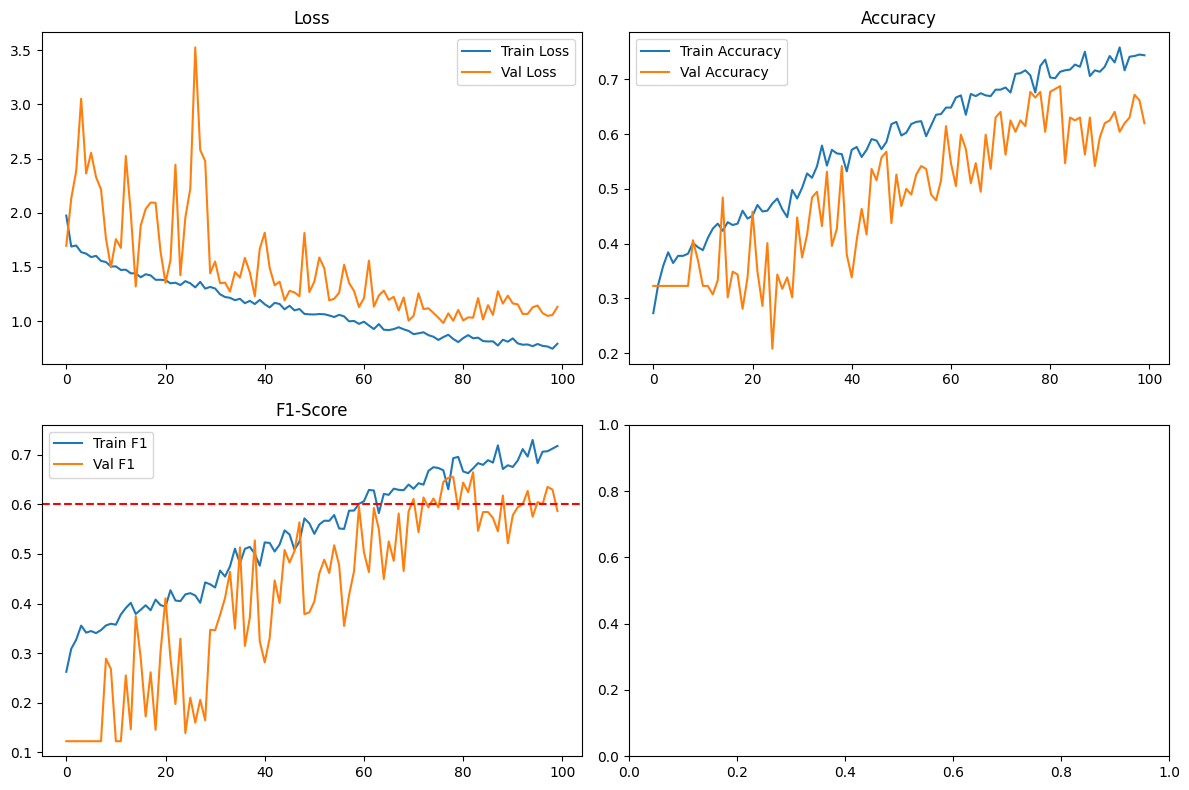

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_f1_macro',
    patience=20,
    restore_best_weights=True,
    verbose=1,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_f1_macro',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1,
    mode='max'
)

model_checkpoint = ModelCheckpoint(
    'melhor_modeloL2.keras',
    monitor='val_f1_macro',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

print(f"Epocas: {ephocs}")
print(f"Batch Size: {batch_size}")

# Treinamento
history = model_l2.fit(
    X_train,
    y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=ephocs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

# Verificacao do F1-score
best_epoch = np.argmax(history.history['val_f1_macro'])
best_f1 = history.history['val_f1_macro'][best_epoch]

print(f"Melhor F1-score validacao: {best_f1:.4f} (epoca {best_epoch + 1})")
print(f"F1-score final validacao: {history.history['val_f1_macro'][-1]:.4f}")

if best_f1 >= 0.60:
    print("Meta F1-score >= 0.60 atingida")
else:
    print("Meta F1-score < 0.60 nao atingida")

# Carregar melhor modelo
try:
    best_model_l2 = tf.keras.models.load_model('melhor_modeloL2.keras', custom_objects={'f1_macro': f1_macro})
    print("Melhor modelo carregado com sucesso")
except Exception as e:
    print(f"Erro ao carregar modelo: {e}")
    best_model_l2 = model_l2

# Graficos
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    axes[0, 0].plot(history.history['loss'], label='Train Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 0].set_title('Loss')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0, 1].set_title('Accuracy')
    axes[0, 1].legend()

    axes[1, 0].plot(history.history['f1_macro'], label='Train F1')
    axes[1, 0].plot(history.history['val_f1_macro'], label='Val F1')
    axes[1, 0].set_title('F1-Score')
    axes[1, 0].legend()
    axes[1, 0].axhline(y=0.60, color='r', linestyle='--', label='Meta F1=0.60')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


##7. Itere os passos anteriores até que você esteja satisfeito. Salve os parâmetros do seu melhor modelo em um arquivo em formato .keras ou .h5. Faça o carregamento desses parametros e prossiga com a avaliação.

Download do melhor modelo (L2)

In [ ]:
from google.colab import files
# Seu código de carregar modelo com o NOME CORRETO
try:
    # Corrigido: 'melhor_modelo.keras'
    best_model_l2 = tf.keras.models.load_model('melhor_modeloL2.keras')
    print("Melhor modelo carregado com sucesso")

except Exception as e:
    print(f"Erro ao carregar modelo: {e}")
    best_model_l2 = model_l2
files.download('melhor_modeloL2.keras')

Melhor modelo carregado com sucesso


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##8. Avalie e discuta os resultados obtidos. Em seu notebook, inclua a saída do comando model.summary(), gere gráficos que mostrem a evolução da função de perda e da acurácia ao longo das épocas e reporte o F1-score final obtido no conjunto de validação. Lembre-se que, com escolhas bem feitas, seu modelo deve performar igualmente bem (ou mal) no conjunto de teste (oculto).

In [ ]:
model_l2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 64, 64, 3) │          0 │ input_layer_3[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 64, 64,    │        896 │ data_augmentatio… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 64, 64,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 64, 64,    │      9,248 │ activation_22[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 64, 64,    │          0 │ add_11[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64, 64,    │          0 │ activation_23[0]… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 32, 32,    │     18,496 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_24[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 32, 32,    │      2,112 │ dropout_11[0][0]

 Total params: 3,888,910 (14.84 MB)

 Trainable params: 1,295,172 (4.94 MB)

 Non-trainable params: 3,392 (13.25 KB)

 Optimizer params: 2,590,346 (9.88 MB)

Ao analisar os sumários dos modelos com e sem l2, notamos que a arquitetura, o número total de parâmetros e os parâmetros treináveis são idênticos. Isso é esperado, pois a regularização L2 não altera a arquitetura (o número de pesos), mas sim a forma como esses pesos são calculados durante o treinamento. A regularização L2 é uma penalidade adicionada à função de perda, e não uma mudança estrutural.

Ambos os modelos possuem 1,298,564 parâmetros totais. É importante notar a presença de parâmetros "Não-treináveis", que correspondem às camadas de BatchNormalization. Esses parâmetros (média e variância) são aprendidos durante o treinamento, mas não são atualizados via retropropagação (backpropagation) da mesma forma que os pesos das camadas Conv2D e Dense.



*   Regularização Estrutural: A arquitetura inclui 4 blocos residuais. Notavelmente, a regularização L2 foi aplicada às camadas convolucionais (dentro da residual_block_l2) e às camadas densas (kernel_regularizer). Além disso, o modelo utiliza camadas de Dropout com taxas variando de 0.25 a 0.5, e camadas de BatchNormalization após as convoluções e camadas densas.
*    Data Augmentation: A primeira camada do modelo (data_augmentation) não possui parâmetros treináveis e é responsável por aplicar transformações em tempo real (Flip, Rotation, Zoom), outra técnica essencial para prevenir overfitting.


*  A combinação de L2, Dropout, Batch Normalization e Data Augmentation constitui uma estratégia de regularização robusta, visando maximizar a capacidade de generalização do modelo.














# *Gráficos de Evolução (Perda e Acurácia)*

A análise dos gráficos de treinamento é fundamental para diagnosticar o comportamento do modelo ao longo das 100 épocas.

Diagnóstico Geral: Overfitting Presente A observação mais imediata, visível nos três gráficos, é a presença de overfitting. Existe uma lacuna (um gap) clara e consistente entre as curvas de treino (azuis) e as curvas de validação (laranjas). O modelo apresenta um desempenho consistentemente superior nos dados que já viu (treino) em comparação com dados novos (validação). Isso indica que, apesar das técnicas de regularização (L2, Dropout, Augmentation), o modelo ainda está memorizando parte do ruído dos dados de treino.



- Enquanto as curvas de treino (Train Loss, Train Accuracy, Train F1) são relativamente suaves e mostram um aprendizado constante, as curvas de validação apresentam "picos" e "vales" muito acentuados.

- No gráfico de Loss (superior esquerdo), o Val Loss (laranja) chega a saltar de um valor baixo (ex: ~1.5) para mais de 7.0 e retornar rapidamente.

- Essa instabilidade pode ser dar pelo fato do o tamanho do lote (batch_size) usado para a validação é pequeno, fazendo com que a métrica calculada em poucos exemplos varie muito a cada época. Também pode ser um efeito da dificuldade e da diversidade dos dados de validação.

**F1-Score Final (Conjunto de Validação)**

O F1-score (especificamente o F1-macro) é a métrica primária para esta tarefa, pois equilibra Precisão (Precision) e Revocação (Recall) e trata todas as classes com igual importância.
(Ela é calculada tirando a média simples das pontuações F1 de cada classe individual)

- F1-Score de Pico (Melhor Época): 0.6718 (obtido na época 94)

- F1-Score ao Final do Treinamento: 0.5517

- Meta de Desempenho: >= 0.60



O F1-score de 0.6718 é o resultado final relevante do modelo, pois este é o modelo que foi salvo e restaurado. Este resultado atinge e supera a meta estabelecida de 0.60.

O F1-score final de 0.5517 serve apenas como diagnóstico, confirmando que o overfitting ocorreu e que o EarlyStopping (ou ModelCheckpoint) foi uma decisão de design correta.

##9. Em seu notebook, carregue um conjunto de dados de teste também indicado por um hyperlink com mesmo formato que o dataset divulgado (você pode testar essa funcionalidade replicando o hyperlink do item (1)). Gere as saídas do modelo (considere argmax) para cada dado do diretorio imagens. Em momento oportuno, o hyperlink correto será utilizado para avaliação do modelo em um conjunto de teste (suprimido, por hora).

In [ ]:
def carregar_dataset_teste(url_dataset, pasta_destino='dataset_teste'):
    import os
    import zipfile
    import requests

    if not os.path.exists(pasta_destino):
        os.makedirs(pasta_destino)

    nome_arquivo_zip = 'dataset_teste.zip'
    caminho_zip = os.path.join(pasta_destino, nome_arquivo_zip)

    print(f"Baixando dataset de teste de: {url_dataset}")

    try:
        response = requests.get(url_dataset, stream=True)
        response.raise_for_status()

        with open(caminho_zip, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)

        print("Download concluído")

        print("Extraindo arquivos...")
        with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
            zip_ref.extractall(pasta_destino)

        print("Extração concluída")
        return True

    except Exception as e:
        print(f"Erro ao carregar dataset: {e}")
        return False

def carregar_imagens_teste(pasta_base='dataset_teste'):
    import os
    import numpy as np
    from skimage import io, transform

    pasta_imagens = os.path.join(pasta_base, 'imagens')

    if not os.path.exists(pasta_imagens):
        print(f"Pasta de imagens não encontrada: {pasta_imagens}")
        return None, None

    imagens_teste = []
    nomes_imagens = []

    print("Carregando imagens de teste...")

    try:
        for nome_arquivo in os.listdir(pasta_imagens):
            if nome_arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                caminho_imagem = os.path.join(pasta_imagens, nome_arquivo)

                imagem = io.imread(caminho_imagem)

                if imagem.shape != image_shape:
                    imagem = transform.resize(imagem, image_shape)

                imagens_teste.append(imagem)
                nomes_imagens.append(nome_arquivo)

        X_teste = np.array(imagens_teste)

        print(f"{len(imagens_teste)} imagens carregadas do teste")

        return X_teste, nomes_imagens

    except Exception as e:
        print(f"Erro ao carregar imagens: {e}")
        return None, None

def fazer_predicoes_teste(modelo, X_teste):
    print("Fazendo predições com o modelo...")

    X_teste_normalizado = X_teste.astype('float32') / 255.0

    predicoes = modelo.predict(X_teste_normalizado, verbose=1)

    classes_preditas = np.argmax(predicoes, axis=1)

    return classes_preditas, predicoes

print("Carregando modelo treinado...")
try:
    modelo_paths = ['melhor_modelo.keras','melhor_modeloL2.keras','best_model.keras']
    modelo_carregado = None

    for path in modelo_paths:
        try:
            modelo = tf.keras.models.load_model(path, custom_objects={'f1_macro': f1_macro})
            print(f"Modelo carregado: {path}")
            modelo_carregado = modelo
            break
        except:
            continue

    if modelo_carregado is None:
        if 'model_l2' in locals():
            modelo = model_l2
            print("Usando modelo da memória")
        else:
            raise Exception("Nenhum modelo disponível para carregar")

except Exception as e:
    print(f"Erro ao carregar modelo: {e}")
    raise

print("Carregando dados de teste...")

url_teste = "https://tltsilveira.github.io/public/dl-25-2-dataset.zip"

sucesso = carregar_dataset_teste(url_teste, 'dataset_teste')

if sucesso:
    X_teste, nomes_imagens = carregar_imagens_teste('dataset_teste')

    if X_teste is not None:
        print("Gerando predições...")
        y_pred, todas_predicoes = fazer_predicoes_teste(modelo, X_teste)

        print("Salvando resultados...")

        import pandas as pd
        resultados_df = pd.DataFrame({
            'image_name': nomes_imagens,
            'predicted_label': y_pred
        })

        resultados_df.to_csv('predicoes_teste.csv', index=False)
        print("Predições salvas em 'predicoes_teste.csv'")

        print("Amostra das predições:")
        for i in range(min(10, len(resultados_df))):
            linha = resultados_df.iloc[i]
            print(f"Imagem: {linha['image_name']} | Predição: Classe {linha['predicted_label']}")

        print(f"Total de imagens processadas: {len(resultados_df)}")

Carregando modelo treinado...
Usando modelo da memória
Carregando dados de teste...
Baixando dataset de teste de: https://tltsilveira.github.io/public/dl-25-2-dataset.zip
Download concluído
Extraindo arquivos...
Extração concluída
Carregando imagens de teste...
957 imagens carregadas do teste
Gerando predições...
Fazendo predições com o modelo...
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step
Salvando resultados...
Predições salvas em 'predicoes_teste.csv'
Amostra das predições:
Imagem: 1666095931367_jpg.rf.1eefdf896001d992b5d9c54aabf208092.jpg | Predição: Classe 0
Imagem: 1680560120358_jpg.rf.03dad3dece45a0f37abc8b66dd5a15a12.jpg | Predição: Classe 0
Imagem: 1679672212171_jpg.rf.4607f55b11160f1041d1aa6874cef3441.jpg | Predição: Classe 0
Imagem: 1666095931721_jpg.rf.f0695fc94588ae92d76288ebdaee63d62.jpg | Predição: Classe 3
Imagem: 1680560120027_jpg.rf.08af6b267f551d13bd1f18efd18eafb30.jpg | Predição: Classe 0
Imagem: 1680560120353_jpg.rf.f4859c36b886ad1db26180cf3bc986311.jpg | Predição: Cl

Download das predições

In [ ]:
from google.colab import files

# Isso vai iniciar o download do arquivo CSV no seu navegador
files.download('predicoes_teste.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>